In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.models import load_model
from sklearn import svm
import cv2
from skimage.feature import hog
from sklearn.decomposition import PCA
import numpy as np
from six.moves import cPickle as pickle
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# svm_linear = joblib.load('svm_linear')

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(f'Number of images in X_train = {X_train.shape[0]}')
print(f'Number of images in X_test = {X_test.shape[0]}')
print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')

y_train = y_train.reshape(-1,)  
classes = ["airplane", "automobile", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck"]

Number of images in X_train = 50000
Number of images in X_test = 10000
Shape of X_train = (50000, 32, 32, 3)
Shape of y_train = (50000, 1)


In [3]:
X_train.shape


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

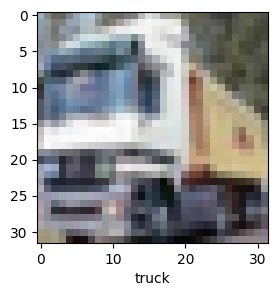

In [5]:
def showImage(X, y, index):
    plt.figure(figsize=(3, 3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
showImage(X_train,y_train,1)

In [6]:
# HOG (Histogram of Oriented Gradients)

X_train_hog = []
X_test_hog = []

winSize = (32, 32)
blockSize = (12, 12)
blockStride = (4, 4)
cellSize = (4, 4)
nbins = 9
# derivAperture = 1
# winSigma = -1.
# histogramNormType = 0
# L2HysThreshold = 0.2
# gammaCorrection = True
# nlevels = 64
# signedGradient = True

hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)

X_train_hog = []
for image in X_train:
    X_train_hog.append( hog.compute(image) )

X_train_hog = np.squeeze(X_train_hog)


X_test_hog = []
for image in X_test:
    X_test_hog.append( hog.compute(image) )

X_test_hog = np.squeeze(X_test_hog)


In [10]:
X_train_hog.shape

(50000, 2916)

In [11]:
X_test_hog.shape

(10000, 2916)

In [41]:
# PCA(Principal Component Analysis)

pca = PCA(n_components=0.98)
X_train_hog_pca = pca.fit_transform(X_train_hog)
X_test_hog_pca = pca.transform(X_test_hog)

In [42]:
X_train_hog_pca.shape

(50000, 1088)

In [43]:
X_test_hog_pca.shape

(10000, 1088)

Linear

In [68]:
svm_linear = svm.SVC(kernel = "linear", C=1.0)
svm_linear.fit(X_train_hog_pca, y_train)
svmFile = open('svm_linear', 'wb')
pickle.dump(svm_linear, svmFile)
svmFile.close()

In [78]:
svm_linear_2 = svm.SVC(kernel = "linear", C=2.0)
svm_linear_2.fit(X_train_hog_pca, y_train)
svmFile = open('svm_linear_2', 'wb')
pickle.dump(svm_linear_2, svmFile)
svmFile.close()

RBF

In [80]:
svm_rbf_1 = svm.SVC(kernel = "rbf", C=1.0, gamma=0.1)
svm_rbf_1.fit(X_train_hog_pca, y_train)
svmFile = open('svm_rbf_1', 'wb')
pickle.dump(svm_rbf_1, svmFile)
svmFile.close()

In [82]:
svm_rbf_2 = svm.SVC(kernel = "rbf", C=1.0, gamma=0.01)
svm_rbf_2.fit(X_train_hog_pca, y_train)
svmFile = open('svm_rbf_2', 'wb')
pickle.dump(svm_rbf_2, svmFile)
svmFile.close()

Sigmoid

In [84]:
svm_sigmoid_1 = svm.SVC(kernel = "sigmoid", C=1.0, gamma=0.1)
svm_sigmoid_1.fit(X_train_hog_pca, y_train)
svmFile = open('svm_sigmoid_1', 'wb')
pickle.dump(svm_sigmoid_1, svmFile)
svmFile.close()

In [86]:
svm_sigmoid_2 = svm.SVC(kernel = "sigmoid", C=1.0, gamma=0.01)
svm_sigmoid_2.fit(X_train_hog_pca, y_train)
svmFile = open('svm_sigmoid_2', 'wb')
pickle.dump(svm_sigmoid_2, svmFile)
svmFile.close()

Polynomial

In [88]:
svm_polynomial_1 = svm.SVC(kernel = "poly", C=1.0, degree=2)
svm_polynomial_1.fit(X_train_hog_pca, y_train)
svmFile = open('svm_polynomial_1', 'wb')
pickle.dump(svm_polynomial_1, svmFile)
svmFile.close()

In [91]:
svm_polynomial_2 = svm.SVC(kernel = "poly", C=1.0, degree=3)
svm_polynomial_2.fit(X_train_hog_pca, y_train)
svmFile = open('svm_polynomial_2', 'wb')
pickle.dump(svm_polynomial_2, svmFile)
svmFile.close()

Accuracy

In [103]:
y_pred_linear_1 = svm_linear.predict(X_test_hog_pca)

In [104]:
# y_pred = svm_linear.predict(X_test_hog_pca)

accuracy_linear = accuracy_score(y_test, y_pred_linear_1)
print("Linear Kernel (C=1) -Percentage Accuracy: %.2f %%" % (accuracy_linear*100))

Linear Kernel (C=1) -Percentage Accuracy: 61.91 %


In [106]:
y_pred_linear_2 = svm_linear_2.predict(X_test_hog_pca)

accuracy_linear_2 = accuracy_score(y_test, y_pred_linear_2)
print("Linear Kernel (C=2) -Percentage Accuracy: %.2f %%" % (accuracy_linear_2*100))

Linear Kernel (C=2) -Percentage Accuracy: 61.18 %


In [107]:
y_pred_rbf_1 = svm_rbf_1.predict(X_test_hog_pca)

accuracy_rbf_1 = accuracy_score(y_test, y_pred_rbf_1)
print("RBF Kernel (gamma=0.1) -Percentage Accuracy: %.2f %%" % (accuracy_rbf_1*100))

RBF Kernel (gamma=0.1) -Percentage Accuracy: 70.56 %


In [110]:
y_pred_rbf_2 = svm_rbf_2.predict(X_test_hog_pca)

accuracy_rbf_2 = accuracy_score(y_test, y_pred_rbf_2)
print("Rbf Kernel (gamma=0.01) -Percentage Accuracy: %.2f %%" % (accuracy_rbf_2*100))

Rbf Kernel (gamma=0.01) -Percentage Accuracy: 63.10 %


In [112]:
y_pred_sigmoid_1 = svm_sigmoid_1.predict(X_test_hog_pca)

accuracy_sigmoid_1 = accuracy_score(y_test, y_pred_sigmoid_1)
print("sigmoid Kernel (gamma=0.1) -Percentage Accuracy: %.2f %%" % (accuracy_sigmoid_1*100))

sigmoid Kernel (gamma=0.1) -Percentage Accuracy: 42.50 %


In [113]:
y_pred_sigmoid_2 = svm_sigmoid_2.predict(X_test_hog_pca)

accuracy_sigmoid_2 = accuracy_score(y_test, y_pred_sigmoid_2)
print("sigmoid Kernel (gamma=0.01) -Percentage Accuracy: %.2f %%" % (accuracy_sigmoid_2*100))

sigmoid Kernel (gamma=0.01) -Percentage Accuracy: 59.90 %


In [116]:
y_pred_poly_1 = svm_polynomial_1.predict(X_test_hog_pca)

In [117]:
# y_pred = svm_polynomial_1.predict(X_test_hog_pca)

accuracy_polynomial_1 = accuracy_score(y_test, y_pred_poly_1)
print("polynomial Kernel (degree=2) -Percentage Accuracy: %.2f %%" % (accuracy_polynomial_1*100))

polynomial Kernel (degree=2) -Percentage Accuracy: 70.82 %


In [118]:
y_pred_poly_2 = svm_polynomial_2.predict(X_test_hog_pca)

In [119]:
# y_pred = svm_polynomial_2.predict(X_test_hog_pca)

accuracy_polynomial_2 = accuracy_score(y_test, y_pred_poly_2)
print("polynomial Kernel (degree=3) -Percentage Accuracy: %.2f %%" % (accuracy_polynomial_2*100))

polynomial Kernel (degree=3) -Percentage Accuracy: 69.08 %


In [156]:
accuracy_all = [accuracy_linear, accuracy_linear_2, accuracy_rbf_1, accuracy_rbf_2, accuracy_sigmoid_1, accuracy_sigmoid_2, accuracy_polynomial_1,accuracy_polynomial_2]
model_name = ['linear(C=1)', 'linear(C=2)', 'Rbf(gamma=0.1)', 'Rbf(gamma=0.01)', 'Sigmoid(gamma=0.1)', 'Sigmoid(gamma=0.01)', 'Poly(degree=2)', 'Poly(degree=3)']

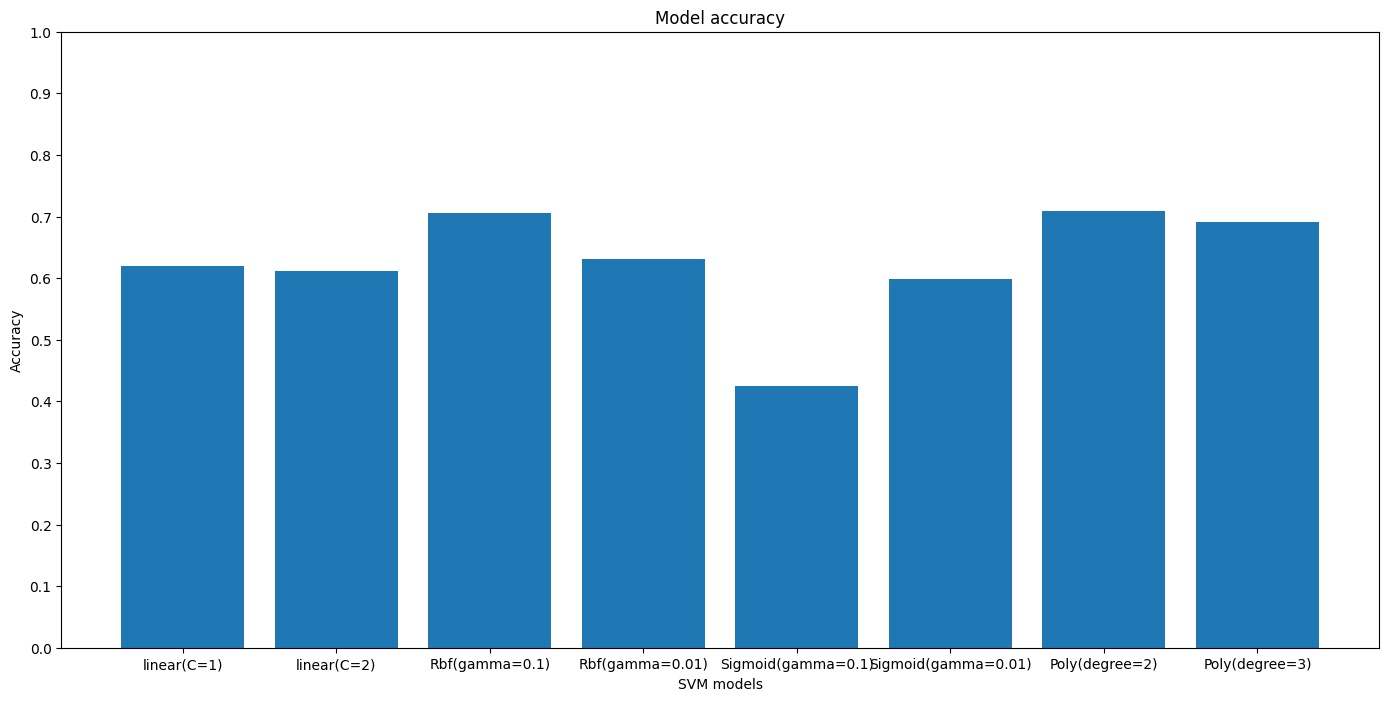

In [147]:
plt.figure(figsize=(17, 8))
plt.bar(model_name, accuracy_all)
plt.xlabel('SVM models')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.savefig(f"Accuracy.jpg")
plt.yticks(np.linspace(0,1,11))
plt.show()

Confusion matrix

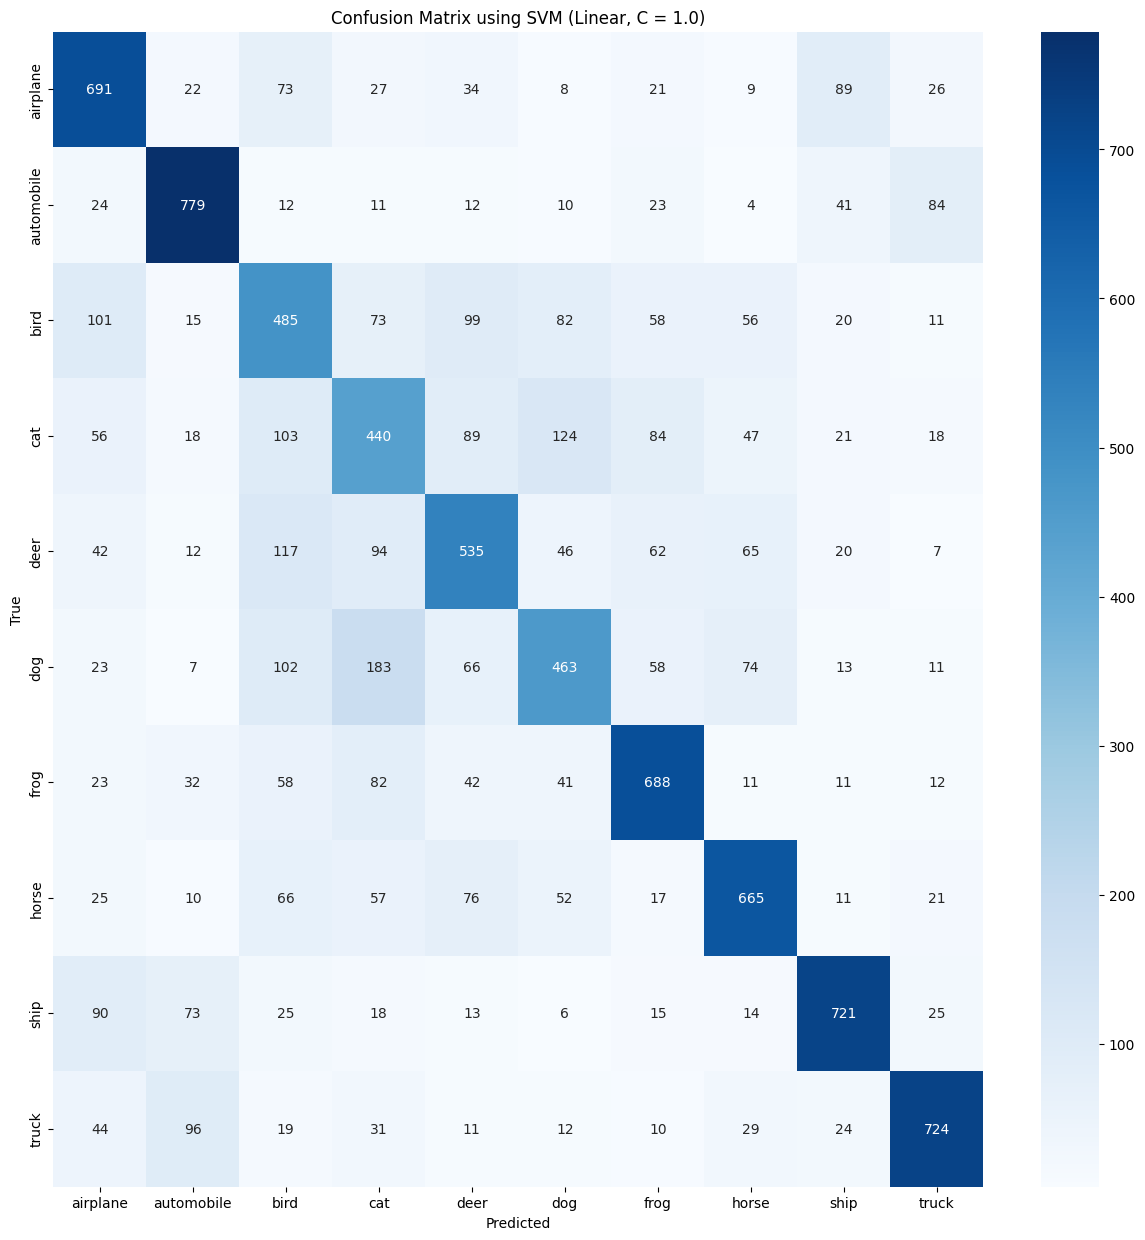

In [105]:
cm = confusion_matrix(y_test,y_pred_linear_1)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM (Linear, C = 1.0)')
plt.savefig(f"svm_linear_1.jpg")
plt.show()

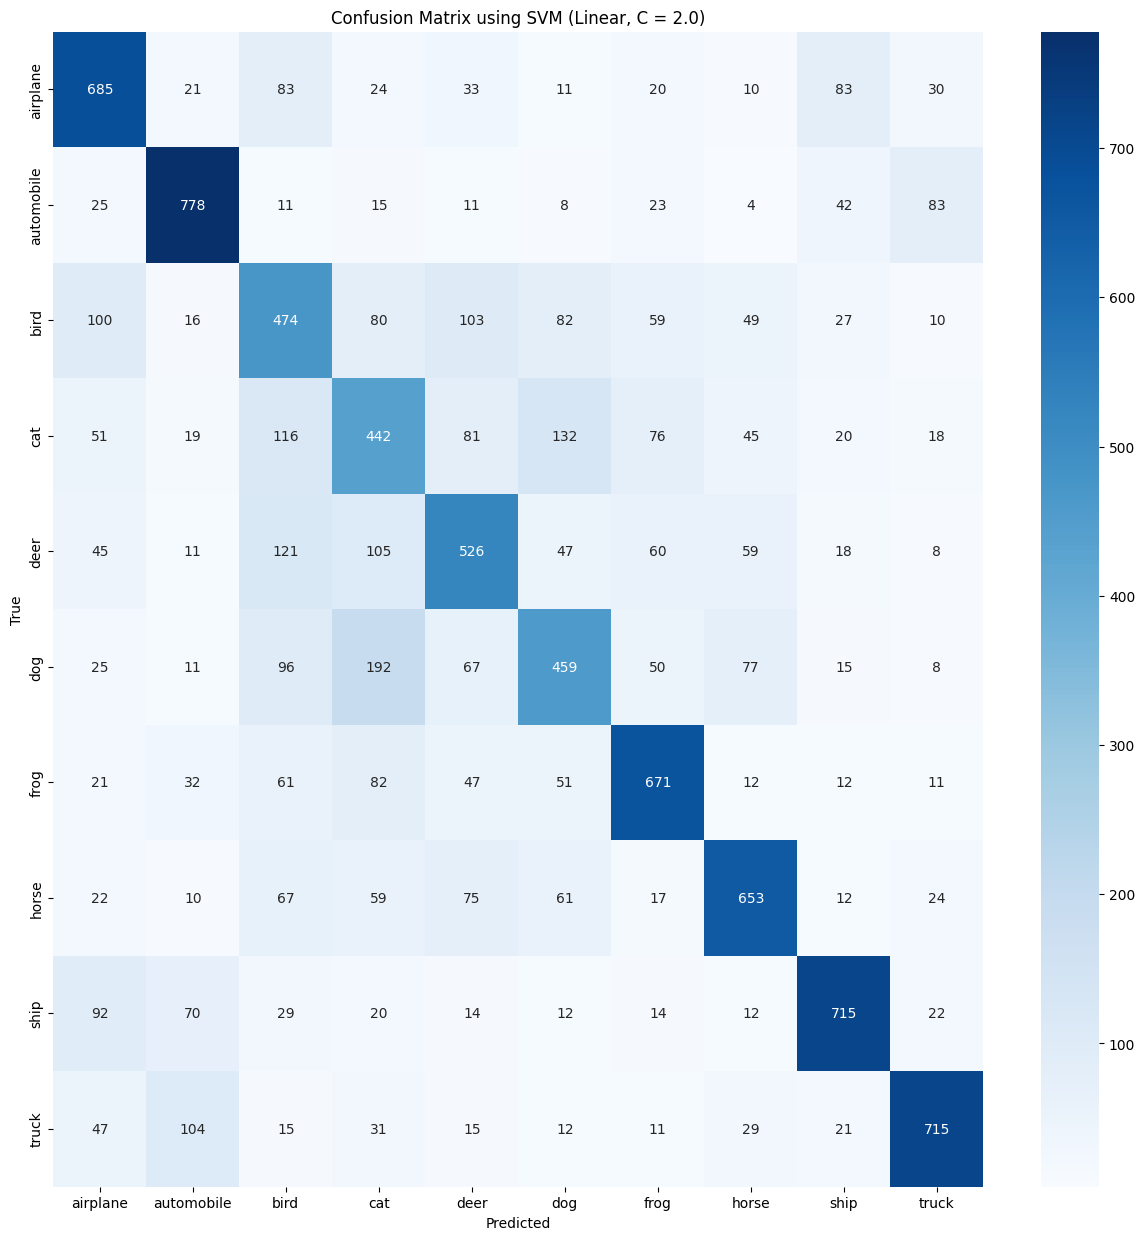

In [108]:
cm = confusion_matrix(y_test,y_pred_linear_2)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM (Linear, C = 2.0)')
plt.savefig(f"svm_linear_2.jpg")
plt.show()

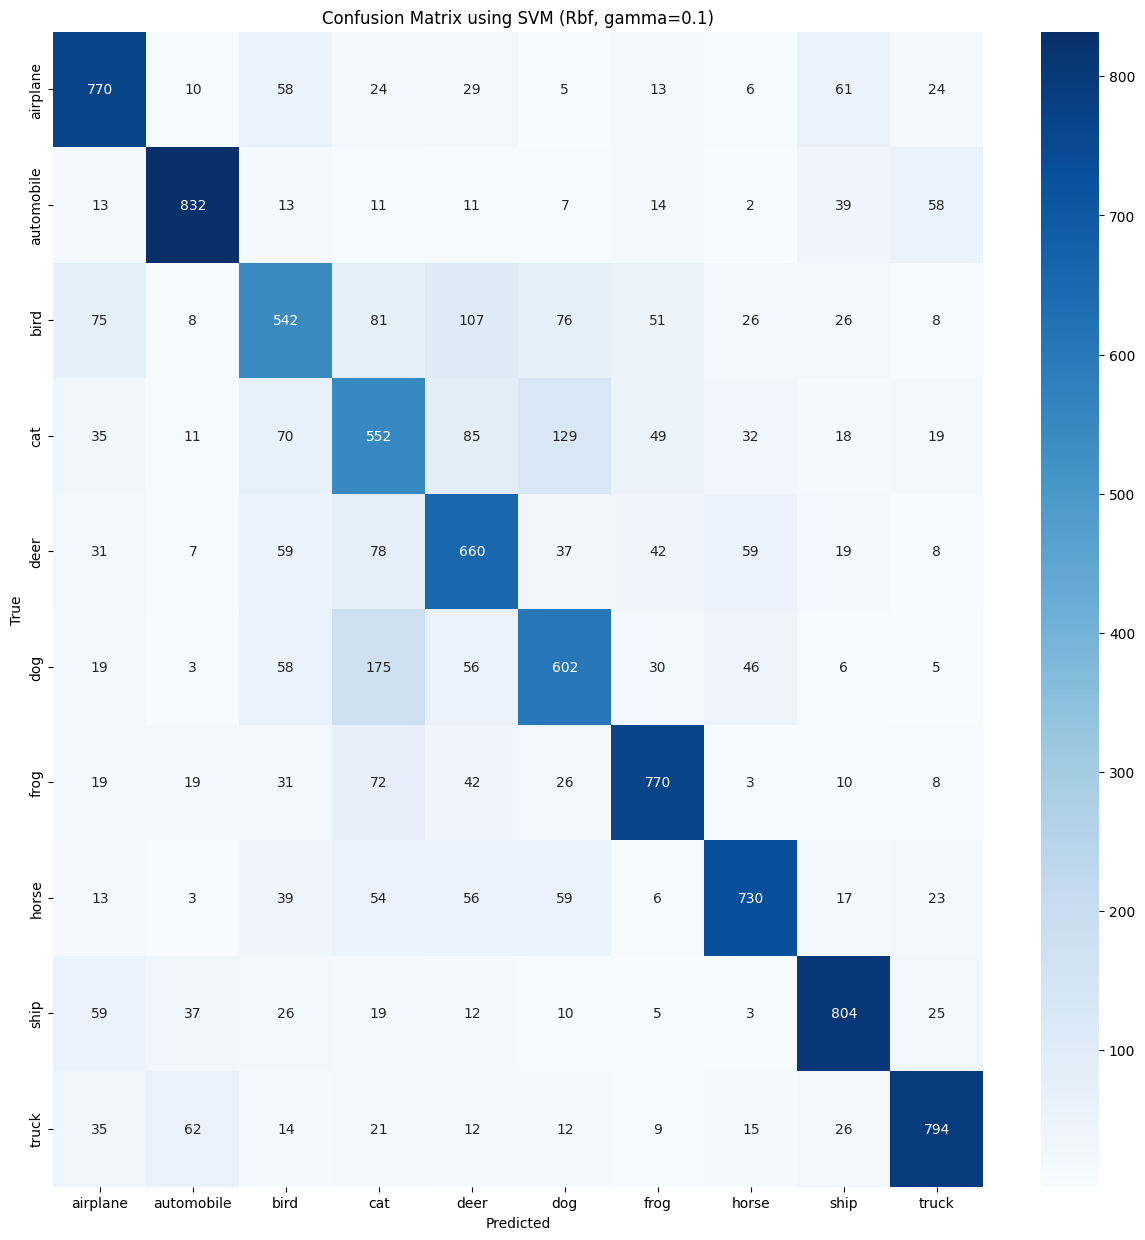

In [109]:
cm = confusion_matrix(y_test,y_pred_rbf_1)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM (Rbf, gamma=0.1)')
plt.savefig(f"svm_rbf_1.jpg")
plt.show()

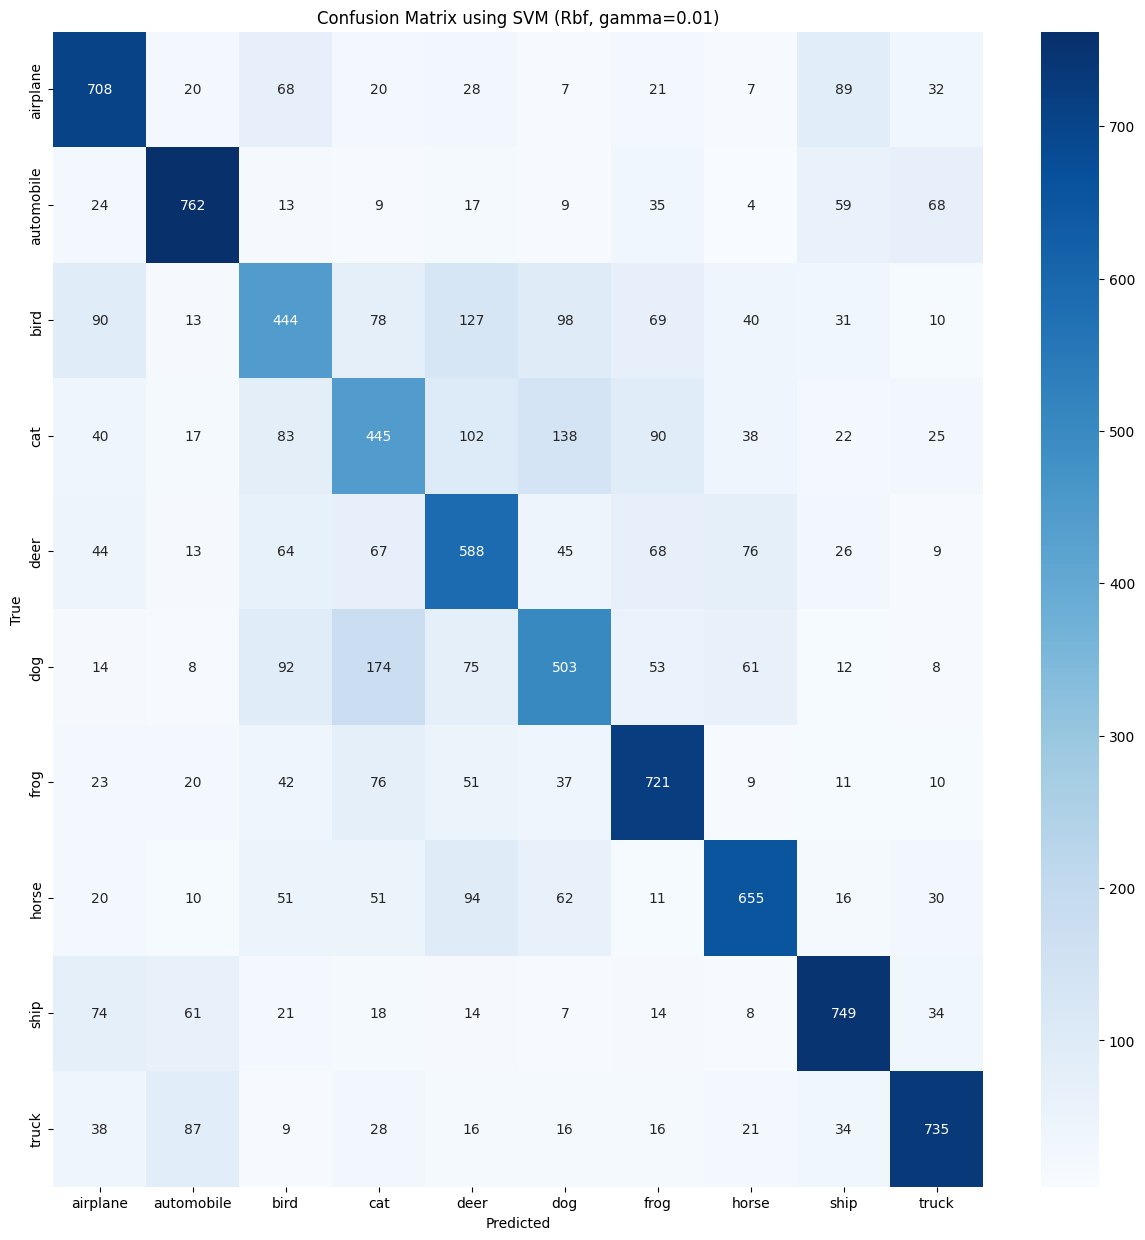

In [111]:
cm = confusion_matrix(y_test,y_pred_rbf_2)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM (Rbf, gamma=0.01)')
plt.savefig(f"svm_rbf_2.jpg")
plt.show()

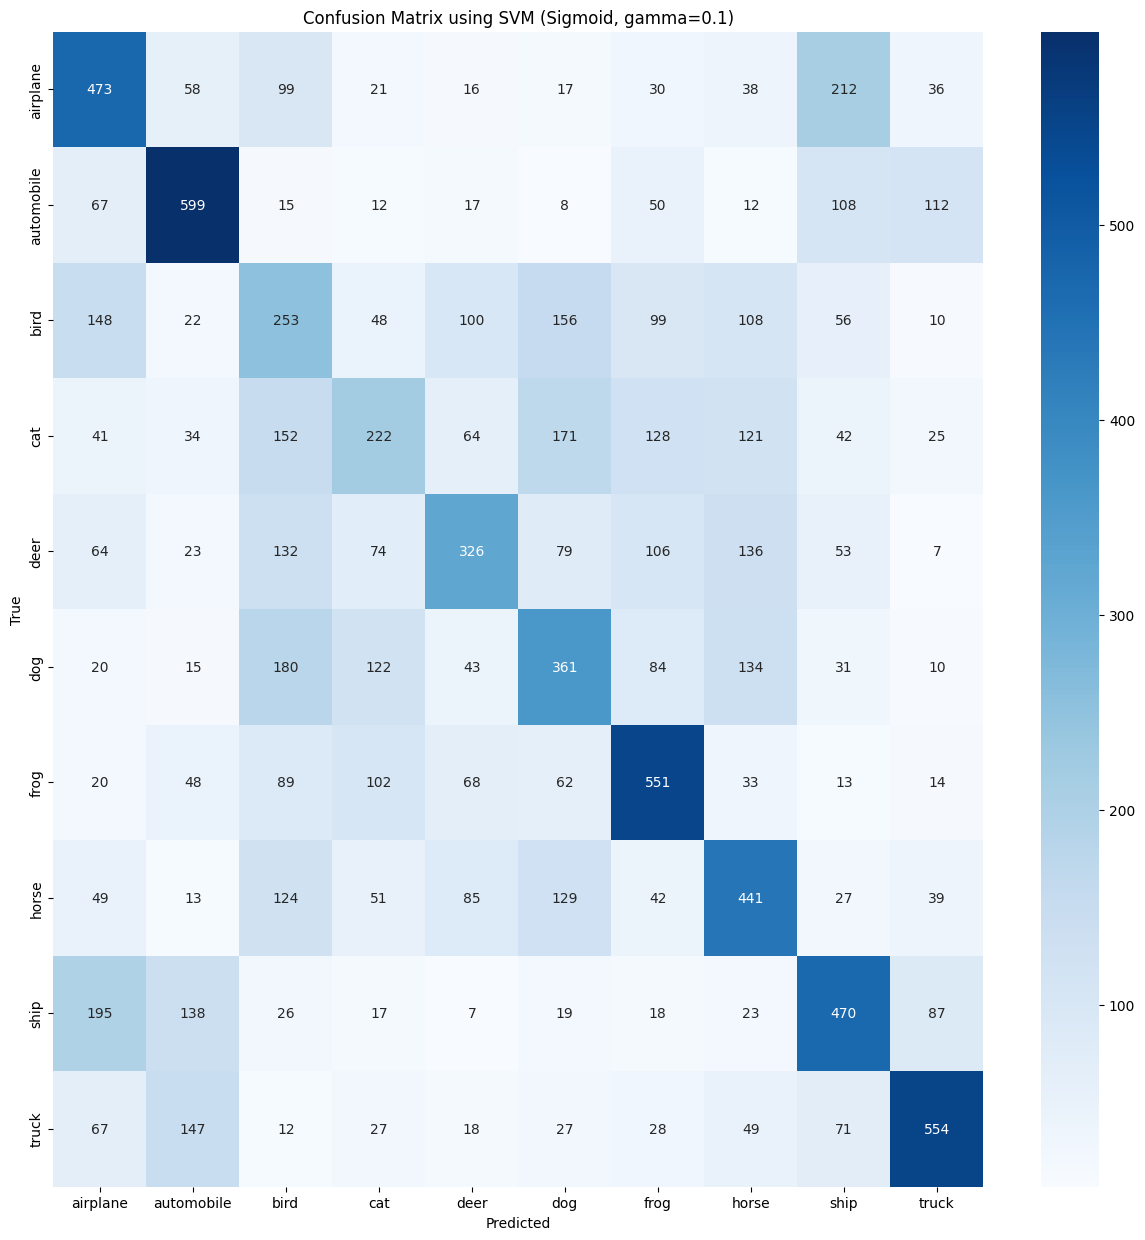

In [114]:
cm = confusion_matrix(y_test,y_pred_sigmoid_1)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM (Sigmoid, gamma=0.1)')
plt.savefig(f"svm_sigmoid_1.jpg")
plt.show()

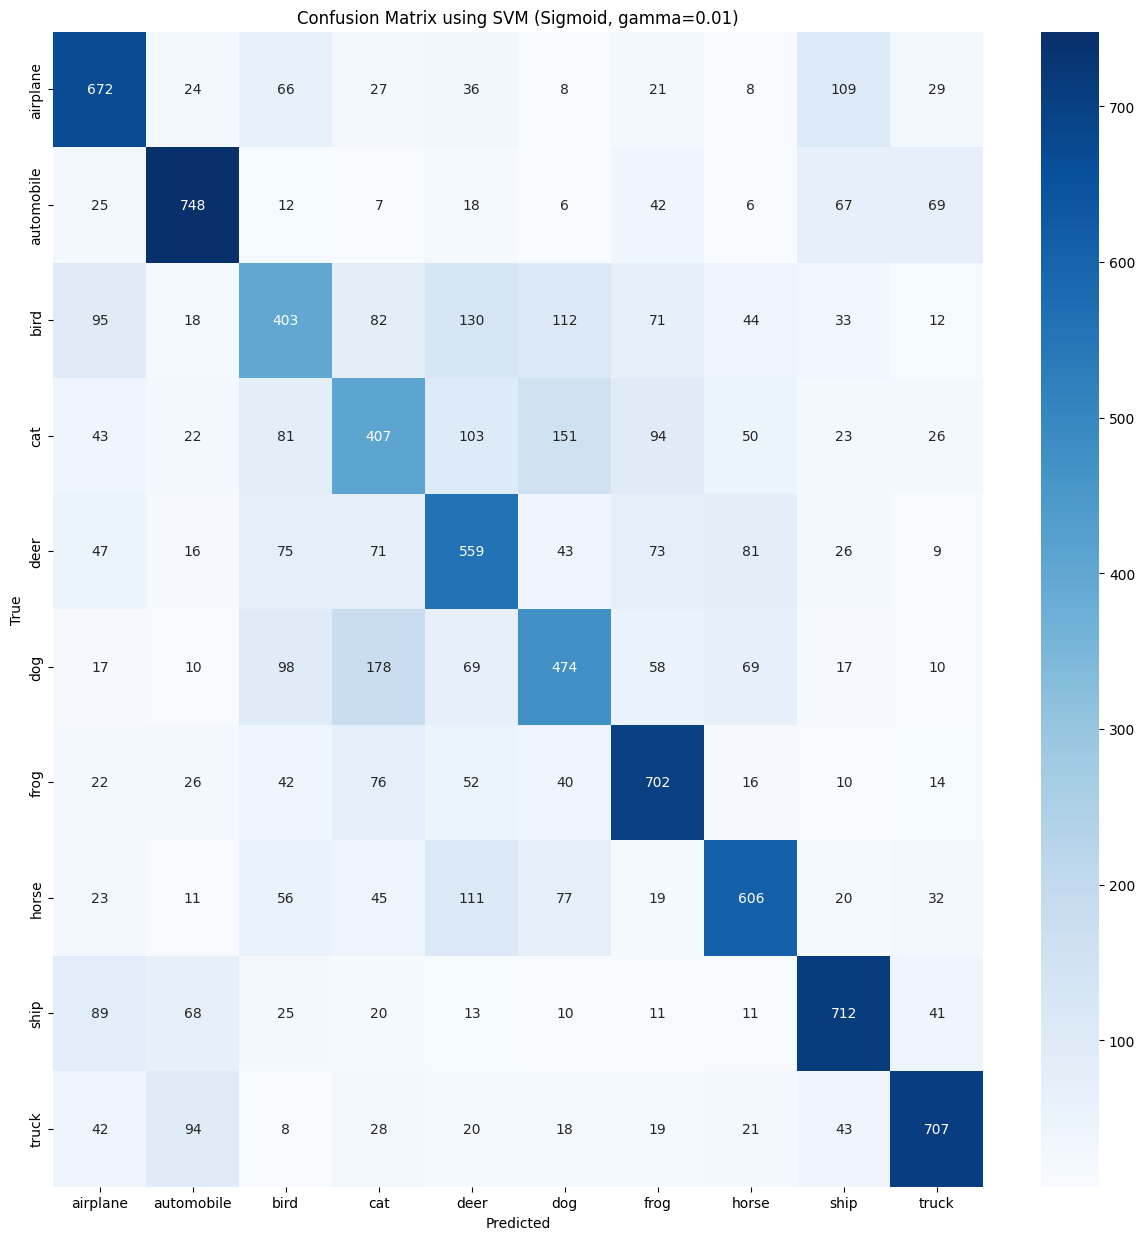

In [115]:
cm = confusion_matrix(y_test,y_pred_sigmoid_2)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM (Sigmoid, gamma=0.01)')
plt.savefig(f"svm_sigmoid_2.jpg")
plt.show()

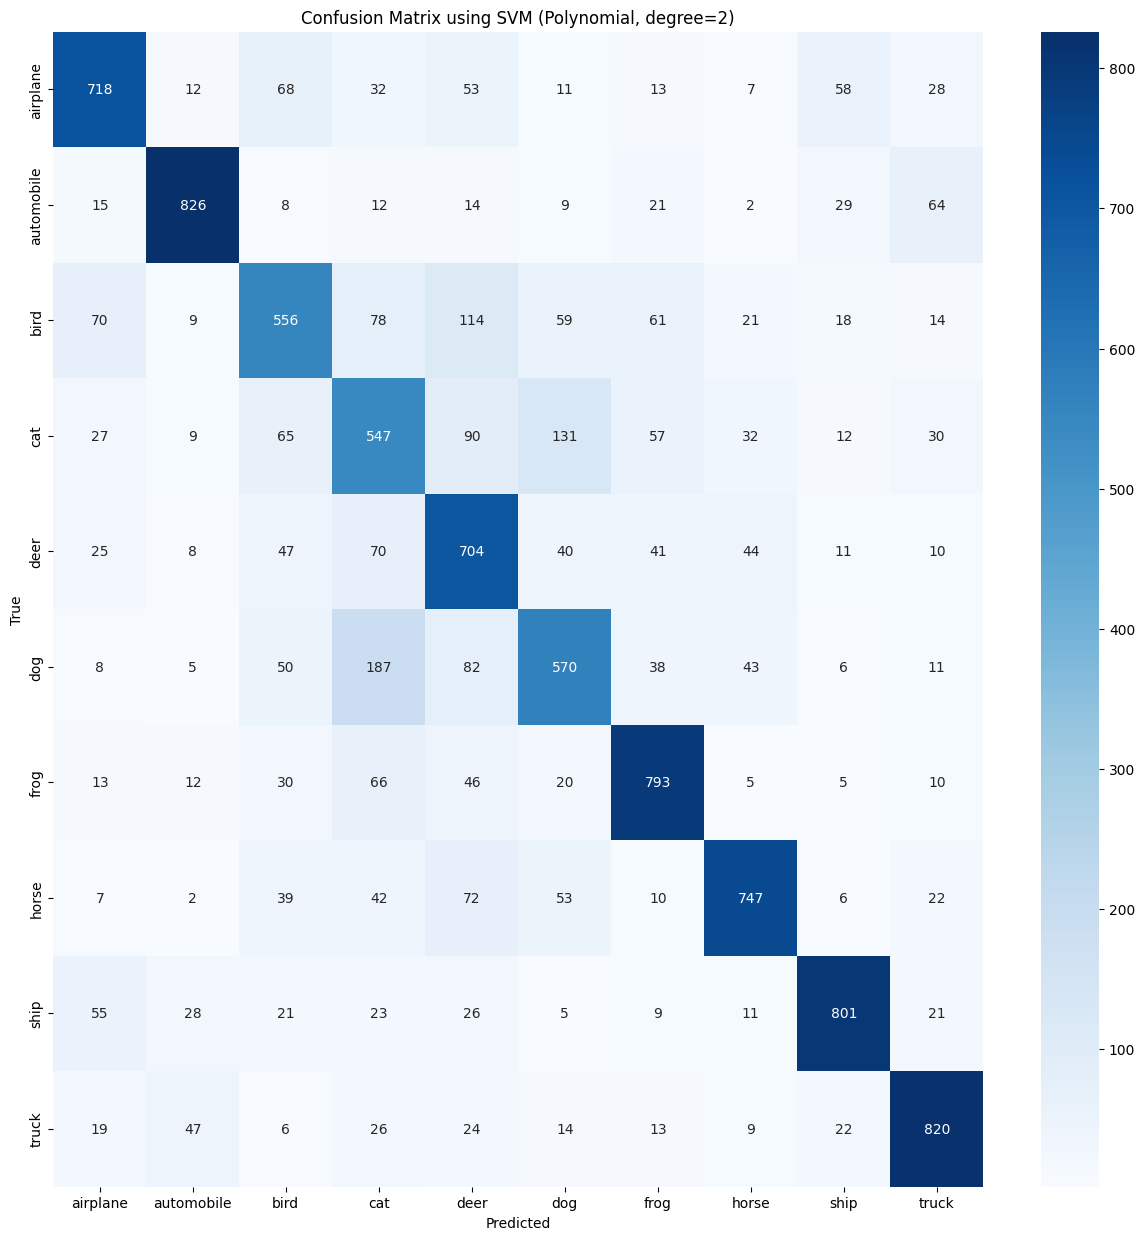

In [122]:
cm = confusion_matrix(y_test,y_pred_poly_1)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM (Polynomial, degree=2)')
plt.savefig(f"svm_poly_1.jpg")
plt.show()

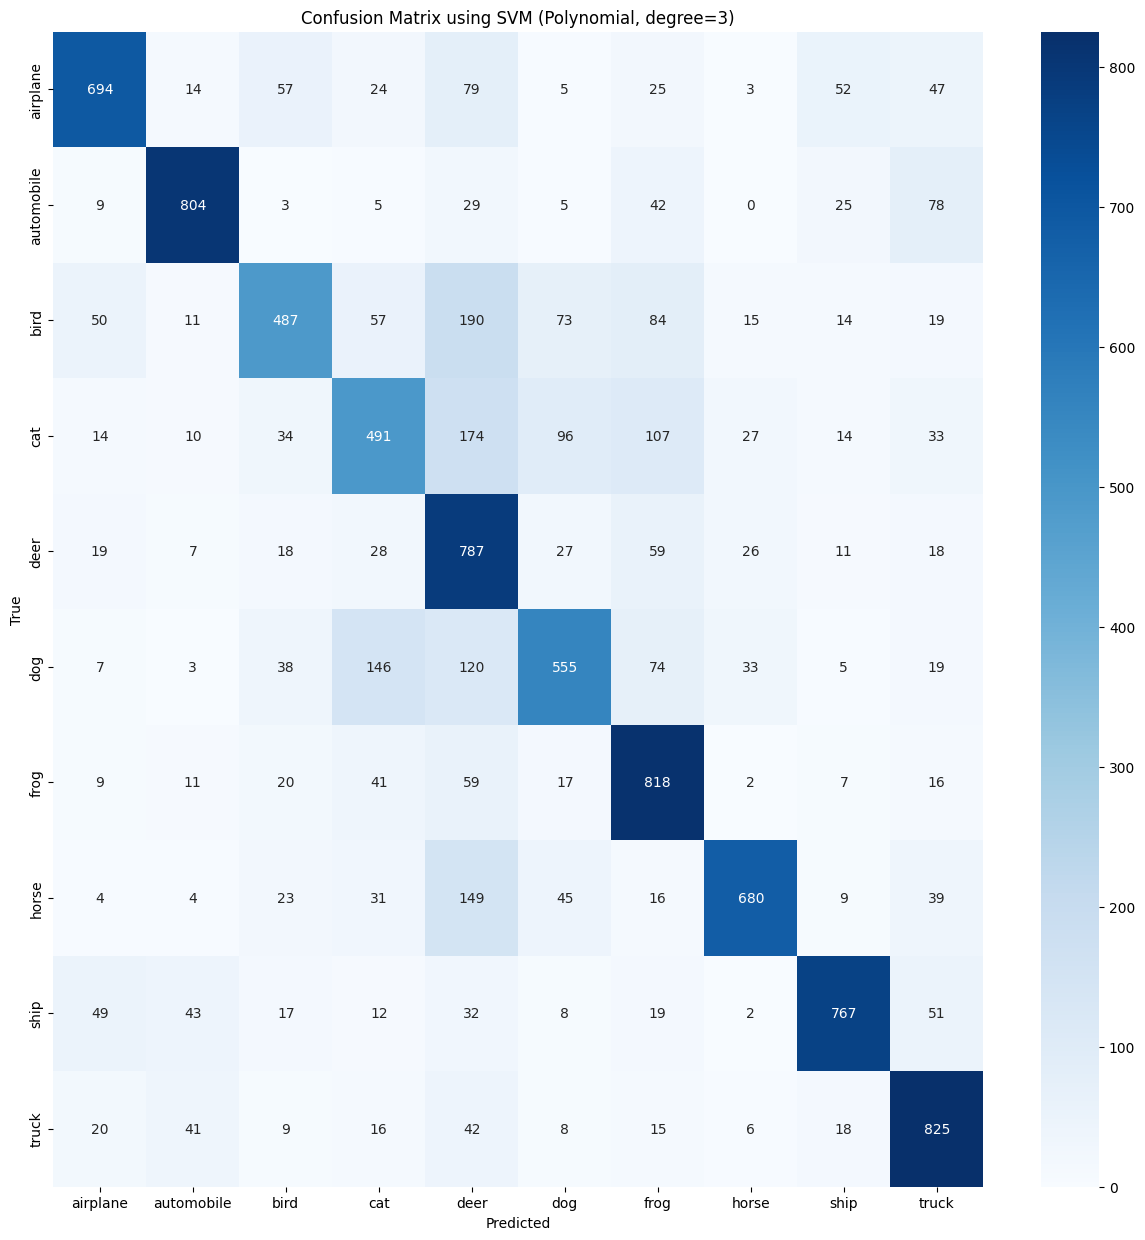

In [123]:
cm = confusion_matrix(y_test,y_pred_poly_2)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM (Polynomial, degree=3)')
plt.savefig(f"svm_poly_2.jpg")
plt.show()

Model comparison

In [152]:
y_pred_all = [y_pred_linear_1, y_pred_linear_2, y_pred_rbf_1, y_pred_rbf_2, y_pred_sigmoid_1, y_pred_sigmoid_2, y_pred_poly_1, y_pred_poly_2]
precision_score_all = []
recall_score_all = []
f1_score_all = []

In [153]:
for pred in y_pred_all:
    precision_score_all.append(precision_score(y_test,pred, average='macro'))
    recall_score_all.append(recall_score(y_test,pred, average='macro'))
    f1_score_all.append(recall_score(y_test,pred, average='macro'))

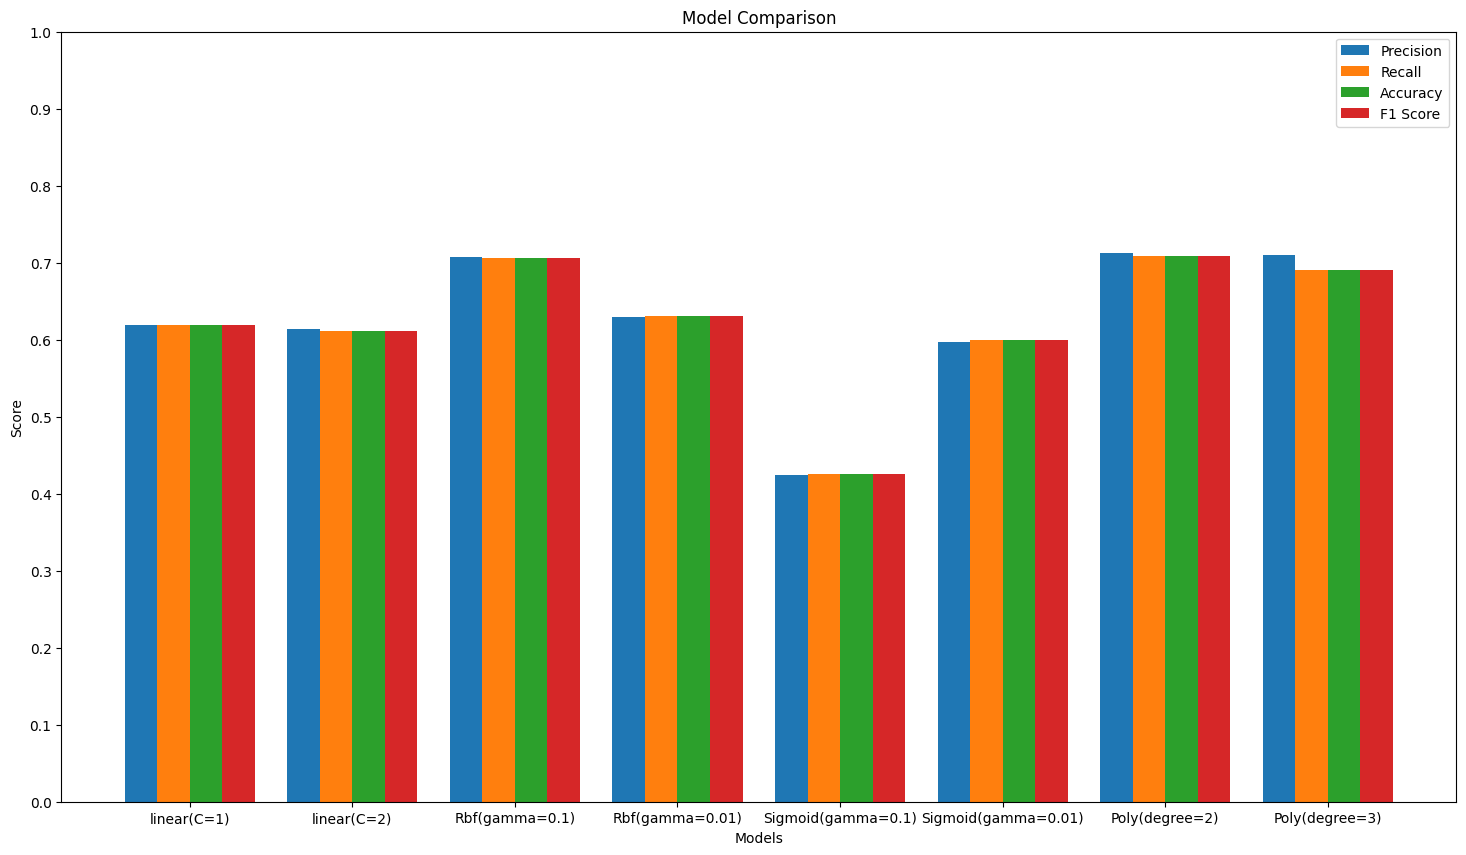

In [166]:
plt.figure(figsize=(18, 10))
model_numbers = np.arange(8)
wid=.2
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.ylim(0,1)

bar1=plt.bar(model_numbers,precision_score_all,width=wid,label='Precision')
bar2=plt.bar(model_numbers+wid,recall_score_all,width=wid,label='Recall')
bar3=plt.bar(model_numbers+2*wid,accuracy_all,width=wid,label='Accuracy')
bar4=plt.bar(model_numbers+3*wid,f1_score_all,width=wid,label='F1 Score')


plt.yticks(np.linspace(0,1,11))
plt.xticks(model_numbers+ 1.5*wid,model_name) 
plt.legend( (bar1, bar2, bar3,bar4), ('Precision', 'Recall', 'Accuracy','F1 Score') ) 

plt.savefig(f"Model_comperison.jpg")
plt.show()